<a href="https://colab.research.google.com/github/plaban1981/INEURON/blob/Supervised-Models/Interactive_Widget_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://towardsdatascience.com/interactive-visualization-of-decision-trees-with-jupyter-widgets-ca15dd312084

* Decision Trees are broadly used supervised models for classification and regression tasks.

* These classifiers build a sequence of simple if/else rules on the training data through which they predict the target value. 

* Decision trees are simple to interpret due to their structure and the ability we have to visualize the modeled tree.

In [0]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [2]:
# load dataset
data = load_wine()

# feature matrix
X = data.data

# target vector
y = data.target

# class labels
labels = data.feature_names

# print dataset description
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [3]:
estimator = DecisionTreeClassifier()
estimator.fit(X, y)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [5]:
labels

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [0]:
graph = Source(tree.export_graphviz(estimator, out_file=None
   , feature_names=labels, class_names=['0', '1', '2'] 
   , filled = True))

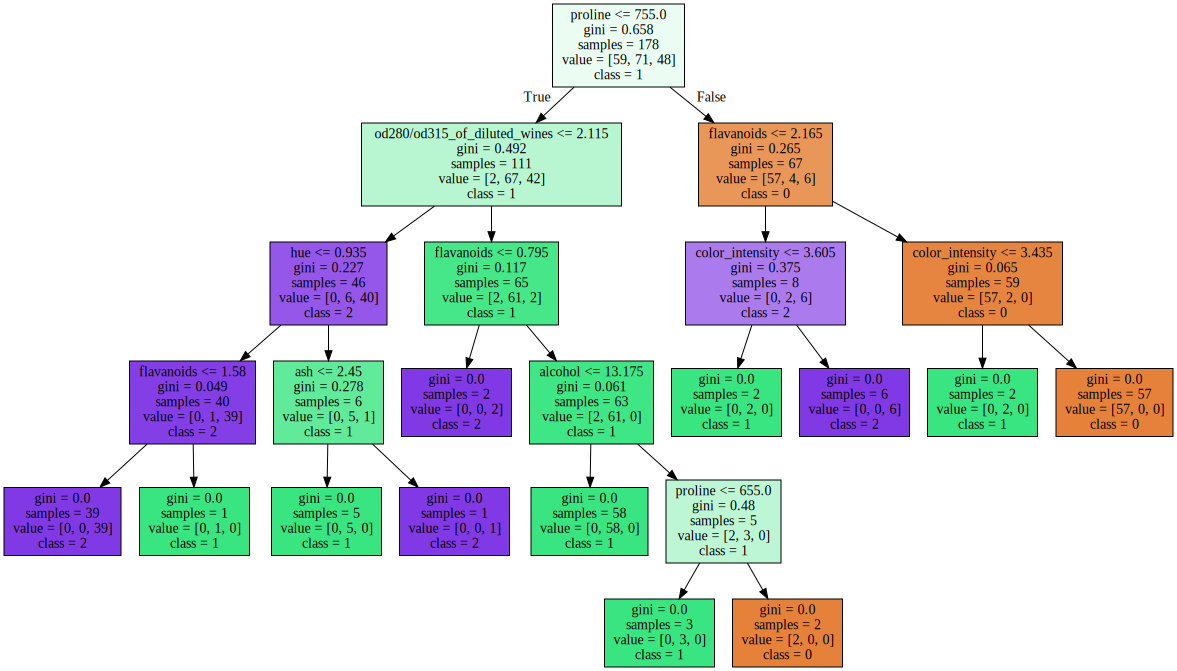

In [6]:
display(SVG(graph.pipe(format='svg')))

* In the tree plot, each node contains the condition (if/else rule) that splits the data, along with a series of other metrics of the node. 

* Gini refers to the Gini impurity, a measure of the impurity of the node, i.e. how homogeneous are the samples within the node. 

* We say that a node is pure when all its samples belong to the same class. In that case, there is no need for further split and this node is called a leaf. 

* Samples is the number of instances in the node, while the value array shows the distribution of these instances per class. 

* At the bottom we see the majority class of the node.

* When filled option of export_graphviz is set to True each node gets colored according to the majority class.

**decision trees** tend to **over-fit the data**, by constructing complex models. 

#### Over fitted models will most likely not generalize well in “unseen”

Two main approaches to prevent over-fitting are pre and post-pruning. 
* Pre-pruning means restricting the depth of a tree prior to creation
* post-pruning is removing non-informative nodes after the tree has been built.

** Sklearn learn decision tree classifier implements only pre-pruning.**

Pre-pruning can be controlled through several parameters such as 

- the maximum depth of the tree, 
- the minimum number of samples required for a node to keep splitting and 
- the minimum number of instances required for a leaf 

#### Instead of plotting a tree each time we make a change, we can make use of Jupyter Widgets (ipywidgets) to build an interactive plot of our tree.

Jupyter widgets are interactive elements that allow us to render controls inside the notebook.

conda install -c conda-forge ipywidgets

In [8]:
!pip install ipywidgets 
!jupyter nbextension enable --py widgetsnbextension

ERROR! Session/line number was not unique in database. History logging moved to new session 59
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


* First, we define a function that trains and plots a decision tree. 

* Then, we pass this function along with a set of values for each of the parameters of interest to the interactive function. 

* The latter returns a Widget instance that we show with display.

In [0]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display                               
from ipywidgets import interactive

In [0]:
# load dataset
data = load_wine()
# feature matrix
X = data.data
# target vector
y = data.target
# class labels
labels = data.feature_names
def plot_tree(crit, split, depth, min_split, min_leaf=0.2):
  estimator = DecisionTreeClassifier(random_state = 0 
      , criterion = crit
      , splitter = split
      , max_depth = depth
      , min_samples_split=min_split
      , min_samples_leaf=min_leaf)
  estimator.fit(X, y)
  graph = Source(tree.export_graphviz(estimator
      , out_file=None
      , feature_names=labels
      , class_names=['0', '1', '2']
      , filled = True))
  display(SVG(graph.pipe(format='svg')))
  return estimator

In [14]:
inter=interactive(plot_tree 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[1,2,3,4,8,10]
   , min_split=(0.1,1)
   , min_leaf=(0.1,0.5))
display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…